In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf

In [2]:
hcp = pd.read_excel("HCP_Data_KDAG_Hackathon.xlsx")

<AxesSubplot:>

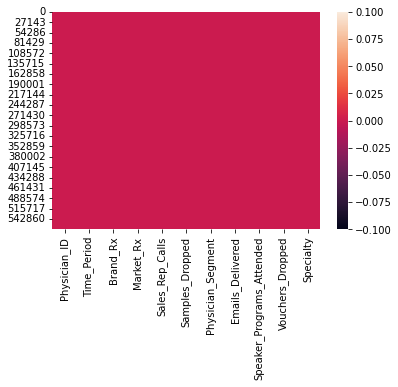

In [3]:
sb.heatmap(hcp.isnull()) 

In [4]:
hcp_copy = hcp.copy()
hcp_copy

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist
...,...,...,...,...,...,...,...,...,...,...,...
569995,axt10000,20200103,0.0,2.45597,0,0,3-Low,1,0,0,Dermatologist
569996,axt10000,20200110,0.0,2.38065,0,0,3-Low,0,0,0,Dermatologist
569997,axt10000,20200117,0.0,7.42171,0,0,3-Low,1,0,0,Dermatologist
569998,axt10000,20200124,0.0,5.39345,0,0,3-Low,1,0,0,Dermatologist


In [5]:
# BM_Ratio = BrandRx/MarketRx
hcp_copy['BM_Ratio'] = hcp_copy['Brand_Rx']/hcp_copy['Market_Rx']
hcp_copy.drop(['Brand_Rx','Market_Rx'],axis=1,inplace=True)
hcp_copy.fillna(value=0,inplace=True)

In [6]:
hcp_copy.describe()

,Time_Period,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,BM_Ratio
count,5.700000e+05,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000
mean,2.019150e+07,0.391295,0.865719,0.271174,0.005746,0.042044,0.068314
std,2.693162e+03,0.488041,3.437103,0.710370,0.076183,0.448897,0.115103
min,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019041e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.019072e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.019102e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.108205
max,2.020013e+07,1.000000,156.000000,8.000000,2.000000,23.000000,0.371747


In [7]:
hcp_copy.loc[hcp_copy['Samples_Dropped'] >0, 'Samples_Dropped'] = 1
hcp_copy.loc[hcp_copy['Samples_Dropped'] ==0, 'Samples_Dropped'] = 0
hcp_copy.loc[hcp_copy['Emails_Delivered'] >0, 'Emails_Delivered'] = 1
hcp_copy.loc[hcp_copy['Emails_Delivered'] ==0, 'Emails_Delivered'] = 0

In [8]:
hcp_copy.describe()

,Time_Period,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,BM_Ratio
count,5.700000e+05,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000
mean,2.019150e+07,0.391295,0.102765,0.171805,0.005746,0.042044,0.068314
std,2.693162e+03,0.488041,0.303652,0.377211,0.076183,0.448897,0.115103
min,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019041e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.019072e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.019102e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.108205
max,2.020013e+07,1.000000,1.000000,1.000000,2.000000,23.000000,0.371747


In [9]:
phy= pd.get_dummies(hcp_copy['Physician_Segment'])
sp = pd.get_dummies(hcp_copy['Specialty'])
hcp_copy.drop(['Physician_Segment','Specialty'],axis=1,inplace=True)
hcp_copy=pd.concat([hcp_copy,phy,sp],axis=1)

In [14]:
train_size = int((57 * 0.8))
test_size = 57 - train_size

In [16]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, :]
        y = data[i + k, :]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [17]:
#RNN Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(4, input_shape=(10, 4)))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
predictions = []
look_back =10
for i in range(10000):
    dummy_predictions = [0,0,0]
    hcp_rel = hcp_copy[(57*i):(57*i + 57)]
    
    rep_call = hcp_rel.copy()
    sample_drop = hcp_rel.copy()
    emails_deliver = hcp_rel.copy()
    
    rep_call.drop(['Samples_Dropped','Emails_Delivered'],axis=1,inplace=True)
    sample_drop.drop(['Sales_Rep_Calls','Emails_Delivered'],axis=1,inplace=True)
    emails_deliver.drop(['Samples_Dropped','Sales_Rep_Calls'],axis=1,inplace=True)
    
    train_rep_call = np.array(rep_call.iloc[0:train_size,2:6])
    test_rep_call = np.array(rep_call.iloc[train_size:,2:6])
    trainX_rep_call, trainY_rep_call = create_dataset(train_rep_call, look_back)
    testX_rep_call, testY_rep_call = create_dataset(test_rep_call, look_back)
    model.fit(trainX_rep_call, trainY_rep_call, epochs=10, batch_size = 1)
    loss_rep_call = model.evaluate(testX_rep_call,testY_rep_call)
    dummy_predictions[0] = loss_rep_call

    train_sample_drop = np.array(sample_drop.iloc[0:train_size,2:6])
    test_sample_drop = np.array(sample_drop.iloc[train_size:,2:6])
    trainX_sample_drop, trainY_sample_drop = create_dataset(train_sample_drop, look_back)
    testX_sample_drop, testY_sample_drop = create_dataset(test_sample_drop, look_back)
    model.fit(trainX_sample_drop, trainY_sample_drop, epochs=10, batch_size = 1)
    loss_sample_drop = model.evaluate(testX_sample_drop,testY_sample_drop)
    dummy_predictions[1] = loss_sample_drop

    train_emails_deliver = np.array(emails_deliver.iloc[0:train_size,2:6])
    test_emails_deliver = np.array(emails_deliver.iloc[train_size:,2:6])
    trainX_emails_deliver, trainY_emails_deliver = create_dataset(train_emails_deliver, look_back)
    testX_emails_deliver, testY_emails_deliver = create_dataset(test_emails_deliver, look_back)
    model.fit(trainX_emails_deliver, trainY_emails_deliver, epochs=10, batch_size = 1)
    loss_emails_deliver = model.evaluate(testX_emails_deliver,testY_sample_drop)
    dummy_predictions[2] = loss_emails_deliver
    
    predictions[i] = dummy_predictions.index(min(dummy_predictions))
    

Epoch 1/10
47/47 [==============================] - 2s 3ms/step - loss: 0.2689
Epoch 2/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1839
Epoch 3/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1827
Epoch 4/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1483
Epoch 5/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1356
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 0.1336
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.1380
Epoch 8/10
47/47 [==============================] - 0s 3ms/step - loss: 0.1351
Epoch 9/10
47/47 [==============================] - 0s 3ms/step - loss: 0.1329
Epoch 10/10
47/47 [==============================] - 0s 3ms/step - loss: 0.1339


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\generic_utils.py:239: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [11]:
hcp_rel = hcp_copy[0:57]
hcp_rel

,Physician_ID,Time_Period,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,BM_Ratio,1-High,2-Medium,3-Low,Dermatologist,General Physician,Nurse Practitioner
0,axt00001,20190104,1,0,0,0,0,0.000000,0,0,1,1,0,0
1,axt00001,20190111,1,0,0,0,0,0.000000,0,0,1,1,0,0
2,axt00001,20190118,1,0,0,0,0,0.000000,0,0,1,1,0,0
3,axt00001,20190125,1,1,0,0,0,0.000000,0,0,1,1,0,0
4,axt00001,20190201,1,0,0,0,0,0.000000,0,0,1,1,0,0
5,axt00001,20190208,1,1,1,0,0,0.076459,0,0,1,1,0,0
6,axt00001,20190215,1,0,1,0,0,0.000000,0,0,1,1,0,0
7,axt00001,20190222,0,0,0,0,0,0.000000,0,0,1,1,0,0
8,axt00001,20190301,0,0,0,0,0,0.000000,0,0,1,1,0,0
9,axt00001,20190308,0,0,1,0,0,0.000000,0,0,1,1,0,0


In [19]:
l=[1,2,3]
l.index(min(l))

0